# IMPORTANT

In [32]:
# The notebook should be named as ADS_HW5_<net_id>
# 10 pts will be deducted if the naming convention is not followed

# Task 1 (5 pts) 


##### a) Provide a definition for the concept of a conjugate prior given the Bayesian learning model

Answer: Whenever the prior and posterior belong to the same family of distributions, we call the prior and posterior as Conjugate Distributions, and the prior is called a Conjugate Prior for the likelihood function. The prior distribution p(θ), from which we can obtain the posterior distribution p(θ | x) via Bayes theorem is : 

$p(θ | x) = (p(x | θ) * p(θ) / p(x)$

where p(x | θ) is the likelihood.

##### b) True or False: Selecting a Gaussian prior for a likelihood function that is Gaussian, will ensure that the posterior distribution is also Gaussian

Answer: True

# Task 2 (5 pts). 


1) In the Bayesian linear regression framework (True or False)  
    a) Using a Laplacian prior will lead to the Ridge Regression  
    
#####       Answer: False
       
    b) Using a Laplacian prior will lead to Lasso Regression
    
#####       Answer: True

2) (True or False)  
    a) Ridge can often help with feature selection 
    
#####        Answer: False
    
    b) Lasso can often help with feature selection
    
#####        Answer: True

# Task 3 (10 pts). 
Answer some questions about the properties of Lasso/Ridge:

1.a) Which regression adds penalty equivalent to square of the magnitude of coefficients?  

##### Ridge Regression 

1.b) Which regression adds penalty  equivalent to absolute value of the magnitude of coefficients?

##### Lasso Regression

2) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

##### Ridge Regression

3) Which of the Lasso and Ridge regression is often use to completely eliminate coefficients for some of the regressors?

##### Lasso Regression. The lasso tends to shrink the coefficients to zero.

4) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

##### Zero

5) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

##### Validation

# Extra Credit(50 pts to be applied towards this or any other homework)
For a regression where the variables are highly correlated, which would you use, Lasso or Ridge and why?

##### Answer: Ridge Regression is better where the variables are highly correlated. When the data give little reason to choose between different linear combinations of colinear predictors, lasso will just wander while ridge tends to choose equal weighting.

# Task 4 (15 pts). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=2$ and the prior $w\sim {\cal N}(4,2)$. Compute the posterior distribution after an observation $y=14,x=4$. After all, what is the probability of having $w<4$?

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import Quandl
import statsmodels.formula.api as smf
from scipy import stats
from sklearn import linear_model
from __future__ import print_function
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
 from scipy.stats import norm

In [13]:
def bayes_update(x, y, sigma, w_, sigma_):
    x, y = np.array(x), np.array(y)
    denom = (x**2).sum() / sigma_**2 + 1. / sigma_**2
    return (x.dot(y) / sigma**2 + w_ / sigma_**2) / denom, 1. / np.sqrt(denom)

mu, sigma = bayes_update(x=[4], y=[14], sigma=2, w_=4, sigma_=2)
print('Updated: w~N({}, {})'.format(mu, sigma))
print('p(w>4)={}'.format(norm.cdf(4, mu, sigma)))

Updated: w~N(3.52941176471, 0.485071250073)
p(w>4)=0.834012266459


# Task 5 (20 pts)
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [18]:
## Learn to use numpy - Will be more useful in future
import pandas as pd
import numpy as np

data_train=pd.read_csv("HW_train.csv")
data_test=pd.read_csv("HW_test.csv")

# Remove unwanted column
data_train.drop('Unnamed: 0',axis=1, inplace=True)
data_test.drop('Unnamed: 0',axis=1, inplace=True)

In [19]:
data_train = data_train.add_prefix('x')
data_test = data_test.add_prefix('x')
data_train.rename(columns={'x40':'Y'},inplace=True)
data_test.rename(columns={'x40':'Y'},inplace=True)

In [20]:
# An anonymous function that returns your regression model for future usage
Regress = lambda feature: smf.ols(formula = 'Y ~ %s'%feature, data = data_train).fit()

# For displaying R^2 and linear model summary
def modelEval(lm, key = 'Y'):
    lmy = lm.predict(data_test)
    y_err = lmy - data_test[key]
    y_norm = data_test[key]-np.mean(data_test[key])
    return 1-y_err.dot(y_err)/y_norm.dot(y_norm)  # R2 w.r.t. test set

In [22]:
result = smf.ols(formula = 'Y ~ '+ '+'.join(data_train.columns[:-1]), data = data_train).fit()
print('In sample R-squared: %f'%result.rsquared)
print('Out of sample R-squared: %f'%modelEval(result))
print('Fitted coefficients:')
print (result.params)

In sample R-squared: 1.000000
Out of sample R-squared: -1.028031
Fitted coefficients:
Intercept   -0.022607
x0           2.309668
x1           4.714510
x2          -1.606173
x3          -0.952237
x4          -4.017605
x5          -0.237963
x6          -1.755886
x7          -2.151587
x8          -1.024788
x9          -0.479281
x10          2.363082
x11          1.222896
x12         -0.547845
x13          1.570676
x14         -1.582059
x15         -2.189021
x16         -2.252427
x17         -2.252290
x18          0.082855
x19         -2.078163
x20          1.494662
x21          0.215336
x22          0.058821
x23          0.116275
x24          0.181060
x25          0.079988
x26          0.078709
x27         -0.268607
x28         -0.134959
x29         -0.005563
x30         -0.030106
x31         -0.024292
x32          0.135991
x33         -0.016121
x34         -0.154977
x35         -0.137389
x36         -0.334634
x37          0.017891
x38         -0.141545
x39         -0.036958
dtype: float

# Task 6 (20 pts)
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ and report their performance over the test set.

In [23]:
X_train = data_train.iloc[:,:-1]
y_train = data_train.iloc[:,-1]
X_test = data_test.iloc[:,:-1]
y_test = data_test.iloc[:,-1]

In [24]:
Ridge=linear_model.Ridge(fit_intercept=True, alpha=3000) #try Ridge with an arbitrary regularization parameter lambda=1

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_

#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.919670798394
The R-squared we found for OS Ridge is: 0.521078167083


In [33]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=30)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Lasso))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.948196589758
The R-squared we found for OS Lasso is: 0.642928112765


# Task 7 (25 pts)
a) For each $m=0,1,2,...39$ train OLS, Lasso and Ridge regressions(keep intercept) using the data from Task 5 above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ using the first $m$ columns of the data tables as the regressors  
i.e train the models by adding in a new variable each time. eg. Y~ x0, Y~x0+x1, Y~x0+x1+x2...Y~x0+x1+...+x39  

b) Plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.  
i.e (x-axis is number of regressors, y will be your R^2 for InSample & OutSample for each of the 3 models, all in one graph)


/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


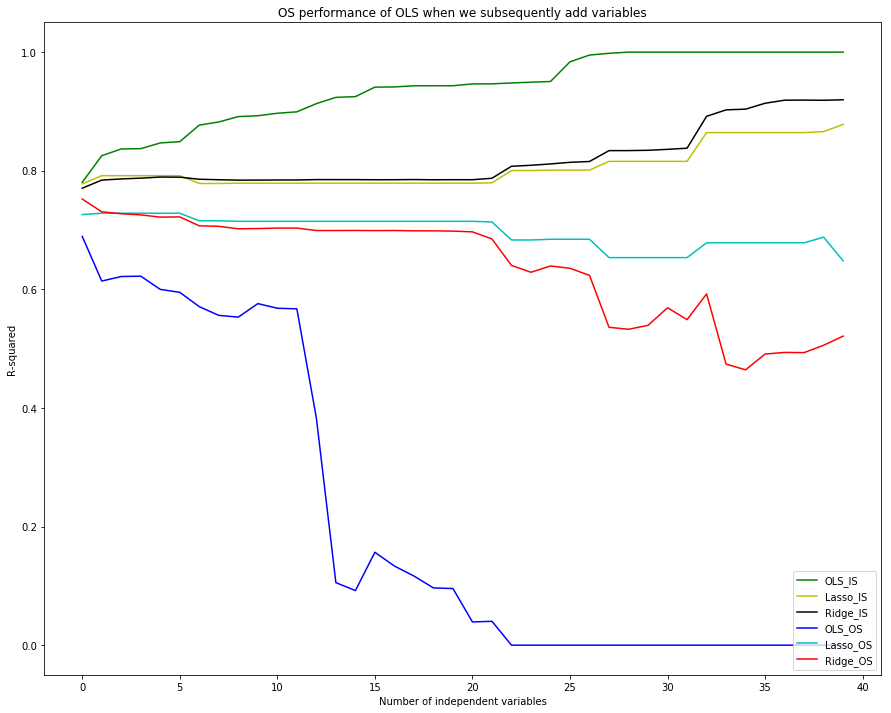

In [26]:
OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]
OLS_R_2_Ridge_OS_F=[]
OLS_R_2_Ridge_IS_F=[]
OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]

Number_variables=range(len(data_train.columns[:-1]))
Ridge=linear_model.Ridge(fit_intercept=True,alpha=3000)
Lasso=linear_model.Lasso(fit_intercept=True, alpha=30)

for j in Number_variables:
    # OLS
    lm = smf.ols(formula = 'Y ~ '+ '+'.join(data_train.columns[:j+1]), 
                 data = pd.concat([X_train.ix[:,:j+1],y_train], axis = 1)).fit()
    error = lm.predict(X_test.ix[:,:j+1]) - y_test
    R_2_OS_OLS=1-error.var()/y_test.var()
    R_2_IS_OLS = lm.rsquared
    OLS_R_2_IS_F.append(R_2_IS_OLS)
    OLS_R_2_OS_F.append(max(R_2_OS_OLS,0))
    
    # Ridge
    Ridge.fit(X_train.ix[:,:j+1],y_train)
    
    # In sample:
    err_IS=Ridge.predict(X_train.ix[:,:j+1]) - y_train
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Ridge_IS_F.append(R_2_IS_Ridge)
    
    #Out of sample
    err_OS=Ridge.predict(X_test.ix[:,:j+1]) - y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Ridge_OS_F.append(max(R_2_OS_Ridge,0))

    # Lasso
    
    Lasso.fit(X_train.ix[:,0:j+1],y_train)
    
    #In sample:
    p_IS=Lasso.predict(X_train.ix[:,0:j+1])
    err_IS=p_IS-y_train
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Lasso_IS_F.append(R_2_IS_Lasso)

    #Out of sample
    p_OS=Lasso.predict(X_test.ix[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Lasso_OS_F.append(max(R_2_OS_Lasso,0))

plt.figure(figsize=(15,12))
plt.title('OS performance of OLS when we subsequently add variables')

plt.plot(Number_variables,OLS_R_2_IS_F,'g',label='OLS_IS')
plt.plot(Number_variables,OLS_R_2_Lasso_IS_F,'y',label='Lasso_IS')
plt.plot(Number_variables,OLS_R_2_Ridge_IS_F,'k',label='Ridge_IS')

plt.plot(Number_variables,OLS_R_2_OS_F,'b',label='OLS_OS')
plt.plot(Number_variables,OLS_R_2_Lasso_OS_F,'c',label='Lasso_OS')
plt.plot(Number_variables,OLS_R_2_Ridge_OS_F,'r',label='Ridge_OS')

plt.legend(loc='lower right')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.show()

# Extracredit (100 pts of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 70% training and 30% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression:   

a) For each $\lambda$ of an assumed sequence of $\lambda$'s(take a random range) compute validation R2 for all the 10 splits and finally select the $\lambda$ having the highest value for validation R2 for each split.  

b) Visualize the dependence of the validation R2 over $\lambda$s for Lasso and Ridge(x-axis = $\lambda$s from sequence, y-axis = corresponding R^2, graph for each split)

c) Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$ out of the 10 splits.

In [27]:
from sklearn.cross_validation import train_test_split
X = data_train.iloc[:,:-1]
y = data_train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

/opt/rh/anaconda/root/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.4,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = 0.4, random_state = 200)

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda

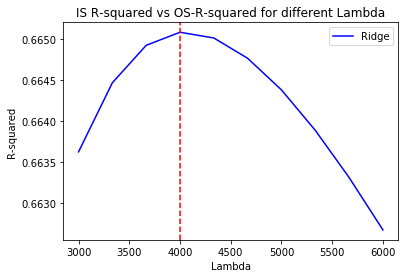

Optimal lambda for Ridge=4000.0


In [36]:
#select best lambda for Ridge
lambdas = np.linspace(3000,6000,10)
lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))

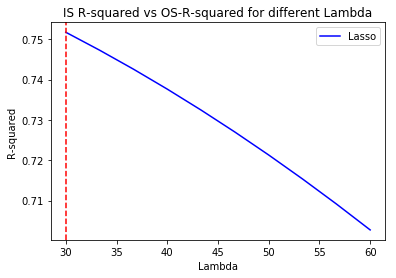

Optimal lambda for Lasso=30.0


In [37]:
#select best lambda for Lasso
lambdas = np.linspace(30,60,10)
#lambdas=[math.exp(i) for i in lambdas]
lambda_l_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Lasso={0}'.format(lambda_l_optimal))

In [31]:
Ridge=linear_model.Ridge(fit_intercept=True,alpha=lambda_r_optimal) #redo Ridge and Lasso with selected regularization parameter lambda
Lasso=linear_model.Lasso(fit_intercept=True,alpha=lambda_l_optimal)

Ridge.fit(X_train,y_train)
Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)

p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)

Ridge_coef=Ridge.coef_
Lasso_coef=Lasso.coef_
############################################################################    
    
#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)

p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Lasso))
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Ridge is: 0.968645034455
The R-squared we found for OS Ridge is: 0.649293934211
The R-squared we found for IS Lasso is: 0.948196589758
The R-squared we found for OS Lasso is: 0.642928112765
